(424, 512)
(424, 512)
(424, 512, 3)


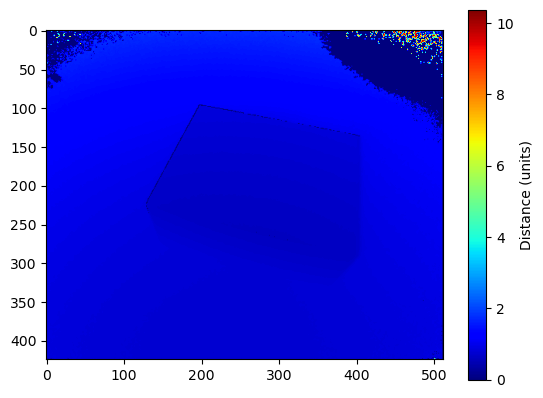

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.cm as cm
data = scipy.io.loadmat("data\example1kinect.mat")

print(data['distances1'].shape)
print(data['amplitudes1'].shape)
print(data['cloud1'].shape)

plt.imshow(data['distances1'], cmap='jet')
plt.colorbar(label='Distance (units)')  # Add a colorbar for interpretation
plt.show()

In [2]:
pc = data['cloud1']
print(data['cloud1'].shape)
print(data['cloud1'].reshape(-1,3).shape)
pc1 = data['cloud1'].reshape(-1,3) #matrix size 217088 x 3 (Rows X Columns)

(424, 512, 3)
(217088, 3)


In [3]:
#valid points
pc1[:,2].shape #only third coulumn

(217088,)

(424, 512)
(424, 3)


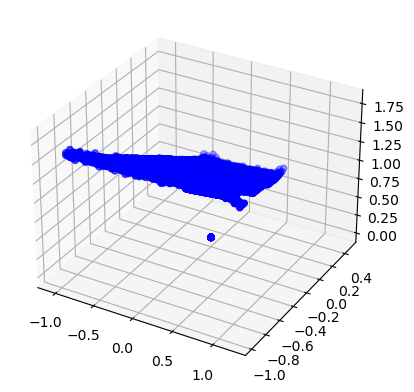

In [4]:
PC = data['cloud1']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
x = PC[:,:, 0]
y = PC[:,:, 1]
z = PC[:,:, 2]

# Plot points
ax.scatter(x, y, z, c='b', marker='o')
print(PC[:,:,2].shape)
print(PC[:,2].shape)

In [41]:
# import random

# def Ransac(pc, t, iter):
#     max_inliers = 0
#     best_m = None
#     #reshaping the Point cloud
#     valid_PC = PC[PC[:, 2] != 0]
#     #for all iterations
    
#     for i in range(iter):
#         #sample three points in for the formation of plane
#         sample_indexes = random.sample(range(valid_PC.shape[0]), 3)
#         sample_points = valid_points[sample_indices]
        
#     return sample_points

# Ransac(data['cloud1'].reshape(-1,3), 3, 5)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 512 but corresponding boolean dimension is 3

In [65]:
#Implement RANSAC algorithm to detect the box in the image

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from LoadData import loadData

def RANSAC(data,thresh, iteration): #vicky
    '''
    :param data: pointcloud
    :param k: number of points to sample
    :param N: Maximum number of iterations
    :param d: Margin for inliers
    :return:
    '''
    data = data.reshape(-1,3) # we dont care about preserving  i,j as such but only care about x,y,z
    #final shape will be (217088, 3) and the last column will access the z component of the point cloud
    
    ####VICKY####
    #check if z component is zero or not
    b_mask = data[:, 2] != 0 #boolean masking of the last column
    valid_data = data[b_mask] #filter out the rows with invalid z component
    ####VICKY#####

    
    best_model = None
    max_inliers = 0
    
    for _ in range(iteration):
        
        #sample 3 points for a 3d pointcloud
        possible_inliers = sample_random_points(valid_data, 3) ####vicky

        #get normal vector for the plane
        p1p2 = possible_inliers[1] - possible_inliers[0]
        p1p3 = possible_inliers[2] - possible_inliers[0]
        normal = np.cross(p1p2, p1p3)

        # using 1st point as all will have approx same d value
        d = -np.dot(normal, possible_inliers[0]) ##distance from to origin to the plane along the normal vector

        #we will calculate the distance matrix contains the each point's distance to our plane (the plane formed by sampled three points)
        dist_vec = np.abs(valid_data @ normal + d)/np.linalg.norm(normal)
        
        also_inliers = valid_data[distances < threshold] ###boolean indexing
        
#         also_inliers = []
#         ###here a better approach is needed because otherwise then it would not be possible maybe!
#         ## maybe use of enumerate may solve the problem
#         for point in valid_data: #for all points in our point cloud
#             if not is_inlier(point, dist_vec, thresh): #check if point is inlier
#                 also_inliers.append(point)
#             also_inliers.append(possible_inliers)
        if len(also_inliers) > max_inliers:
            max_inliers = len(also_inliers)
            best_model = (normal, d) #possible plane
        iterations += 1
    return best_model, max_inliers ## best model should save all the inliers

"""  ##NO NEEED##
def model(possible_inliers):
    #create a normal vector for the plane
    pass
"""
# ###NO NEED###
# def is_inlier(point, dist_vec, thresh):
#     #check if point is inlier
#     #we have to retireive the distance of that particular point to the plane from dist_vec matrix
#     #check if this is less than threshhold
#     ####VICKY#### This function I am leaving for now.
    
#     distance = None
    
#     pass

# def sample_random_points(data, int k):
#     #sample k points from the data
#     radnom_index = np.random.choice(np.arange(data.shape[0]), size=k)
#     random_points = data[radnom_index]
#     return random_points

# Load the mat file

loc = '../data/example1kinect.mat'
A,D,PC = loadData(loc,str(1))

RANSAC(PC, 3, 100, 0.1)

ModuleNotFoundError: No module named 'LoadData'

In [12]:
#visualize all inliers with a mask image
def visual_masked_inlier(data, best_model):
    data_2d = data.reshape(-1,3)
    mask = np.zeros(data_2d.shape[0], data_2d.shape[1])
    for point in enumerate(mask):
        if np.all(point == best_model, axis=1).any():
            mask[i] = True
    return mask
##try this, it should work

In [8]:
##now we have to find the largest dominant plane
from scipy import ndimage
def largest_connected_comp(mask):
    
    #label connected components
    labeled_components, num_features = ndimage.label(mask)
    
    #count the number of pixel in each component
    label_counts = np.bincount(labeled_components.flatten()) #label counts is also a array
    
    # Find the index of the largest connected component we used 1 to avoid the background
    largest_component_idx = np.argmax(label_counts[1:]) #look for the index with the highest number of pixels

    # Extract the largest connected component by comparing indexes
    largest_component = labeled_components == largest_component_idx # elementwise comparison of both

    # Print the largest connected component
    print(largest_component)
    
    #this should work the only thing I can't get is how the index is assigning

(0, array([0., 0., 0.]))
(1, array([0., 0., 0.]))


In [5]:
#find the floor plane
def find_floor_plane(data, thresh, iteration):
    best_model, max_inliers = RANSAC(data,thresh, iteration)
    return best_model, max_inliers

In [ ]:
def find_top_plane():
    #finding the second largest plane that would be our top plane
    #step 1: remove those inliners which are the part of the floor plane!
    #step 2: now, we will have points with the points not inlcluded in the floor
    #step 3: now, use ransac to get the best model (top_plane) in the inliers from step 2
    #step 4: considering masking bcoz we have to mask before largest_component
    #step 5: we calculate the largest component as our top_plane
    #step 6: return top_plane, largest_component
    pass

In [7]:
#morphological operators
#structuring_element
#shape of the elem is rectangular (5,5)
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('smile.jpg')
# transforming to inverse binary
ret, binary_img = cv2.threshold(img, 127, 255, type=cv2.THRESH_BINARY_INV)

# plotting the binary image
plt.figure(figsize=(14, 6))
plt.imshow(binary_img, cmap='gray')
plt.show()

mask 

struc_elem = np.ones((5, 5), np.uint8)
#kernel size should be change accoeding to the size of the working area
def dilate(mask, struc_elem, iterations):
    dilated_mask = cv2.dilate(mask, kernel=struc_elem, iterations=iterations)
    return dilated_mask
def erode(mask, struc_elem, iterations):
    eroded_mask = cv2.erode(mask, kernel=struc_elem, iterations=iterations)
    return eroded_mask
def opening(mask, struc_elem):
    opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel = struc_elem)
    return opened_mask
def closing(mask, struc_elem):
    closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel = struc_elem)
    return closed_mask

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def compute_the_dimension(best_model, best_top_model):
    #Hieght: distance between parellel planes
    #we have normal and d for both of the planes
    #floor plane: best model = (noraml, d)
    #top plane: best_top_model = (normal, d)
    best_model[0]
    best_top_model[0]
    #check if both the normals are parellel or not
    parallel_condition = np.allclose(best_model[0], best_top_model[0]) or np.allclose(-best_model[0], best_top_model[0])
    #return true if both normals are same
    if parellel_condition == True:
        distance = np.abs(best_model[1] - best_top_model[1]) #absolute difference between both plane.
    
    
    return distance

In [ ]:
def visualisation_of_boxes():
    pass

In [8]:
import cv2
mask_img = cv2.imread("mask_img.jpg", cv2.IMREAD_GRAYSCALE)
# Assuming mask is your binary image
cnts = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Get the minimum enclosing rectangle
x, y, w, h = cv2.boundingRect(cnts[0])

# Length and width
length = h
width = w

print(h,w)

ModuleNotFoundError: No module named 'cv2'